# Kurdish Handwritten Character Recognition Using CNN in TensorFlow 

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/images/classification"><img src="https://ars.els-cdn.com/content/image/1-s2.0-S1567133X22X00033-cov150h.gif" hight='32' width='32'/>Read the article</a>
  </td>
  <td>
    <a target="_blank" href="https://nci-rc.com/project/"><img src="https://nci-rc.com/wp-content/uploads/2021/08/5-5.png" hight='32' width='32' />Download the project</a>
  </td>
  
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/classification.ipynb"><img src="https://sdfestaticassets-eu-west-1.sciencedirectassets.com/shared-assets/24/images/elsevier-non-solus-new-grey.svg" hight='32' width='32' />Read about the dataset</a>
  </td>
  <td>
    <a target="_blank" href="https://www.kaggle.com/datasets/rebinma/central-kurdish-handwritten-characters"><img src="https://www.kaggle.com/static/images/logos/kaggle-logo-transparent-300.png" hight='32' width='32' />Download the dataset</a>
  </td>
</table>

Handwriting recognition is one of the active and challenging areas of research in the field of image processing and pattern recognition. It has many applications that include: a reading aid for the blind, automated reading and processing for bank checks, making any handwritten document searchable, and converting them into structural text form. Moreover, high accuracy rates have been recorded by handwriting recognition systems for English, Chinese, Arabic, Persian, and many other languages. Yet there is no such system available for offline Kurdish handwriting recognition.

In this paper, an attempt is made to design and develop a model that can recognize handwritten characters for the Kurdish alphabet using deep learning techniques. Kurdish (Sorani) contains 34 characters and mainly employs an Arabic\Persian based script with a modified alphabet. In this work, a Deep Convolutional Neural Network model is employed that has shown exemplary performance in handwriting recognition systems. Then, a comprehensive dataset was created for handwritten Kurdish characters, which contains more than 40 thousand images. The created dataset has been used for training the Deep Convolutional Neural Network model for classification and recognition tasks.

In the proposed system, the experimental results show an acceptable recognition level. The testing results reported a 96% accuracy rate, and training accuracy reported a 97% accuracy rate. From the experimental results, it is clear that the proposed deep learning model is performing well and is comparable to the similar model of other languages' handwriting recognition systems.

## Citations

Cite the following articles:

Rebin M.Ahmed, Tarik A. Rashid, Polla Fattah, Mohammed Kamal Majeed, Abeer Alsadoon, Nebojsa Bacanin, Seyedali Mirjalili, S.Vimal, Amit Chhabra. 2022. Kurdish Handwritten character recognition using deep learning Gene Expression Patterns.[DOI: https://doi.org/10.1016/j.gep.2022.119278](https://doi.org/10.1016/j.gep.2022.119278)

Rebin M. Ahmed, Tarik A. Rashid, Polla Fatah, Abeer Alsadoon, Seyedali Mirjalili (2021). An Extensive Dataset of Handwritten Central Kurdish Isolated characters, Data in Brief, 107479. [DOI:](https://doi.org/10.1016/j.dib.2021.107479) [https://doi.org/10.1016/j.dib.2021.107479](https://doi.org/10.1016/j.dib.2021.107479)

M. Ahmed, Rebin; Rashid, Tarik; Fattah, Polla (2020), “An extensive dataset of Handwritten Central Kurdish Isolated characters.”, Mendeley Data, [DOI:](http://dx.doi.org/10.17632/f8z9jts5nb) [https://dx.doi.org/10.17632/f8z9jts5nb](http://dx.doi.org/10.17632/f8z9jts5nb)



_______________
This notebook shows how to classify images of kurdish handwritten characters. It creates an image classifier using a `tf.keras.Sequential` model, and loads data using `tf.keras.utils.image_dataset_from_directory`. You will gain practical experience with the following concepts:


## Import TensorFlow and other libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os
import PIL
import datetime

## Download and explore the dataset

This tutorial uses a dataset of about 40,826 images of handwritten central kurdish characters. The dataset contains 35 sub-directories, one per class:

```
KHCR/
  01/
  02/
  03/
  .
  .
  .
  34/
  35/
```

You can learn more about the dataset in the article published in  [Data in Brief](https://www.sciencedirect.com/science/article/pii/S2352340921007605), and you can download the complete dataset in [Mendely Data](https://data.mendeley.com/datasets/f8z9jts5nb/2) or [Kaggle](https://www.kaggle.com/datasets/rebinma/central-kurdish-handwritten-characters)

In [2]:
dataset_url = "/Users/rebin/py/khcr/KHCR"
data_dir = pathlib.Path(dataset_url)
print(data_dir)

/Users/rebin/py/khcr/KHCR


After downloading, you should now have a copy of the dataset available. There are 40826 total images:

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

40826


Here are some roses:

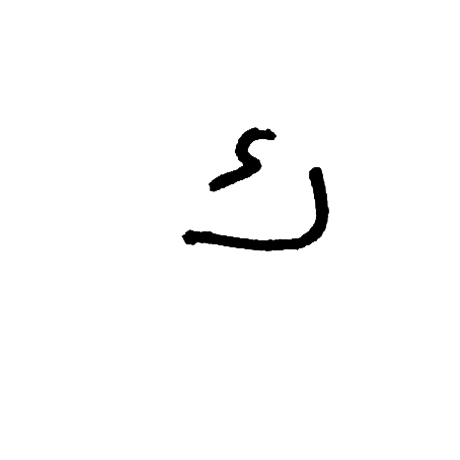

In [4]:
chars = list(data_dir.glob('01/*'))
PIL.Image.open(str(chars[6]))

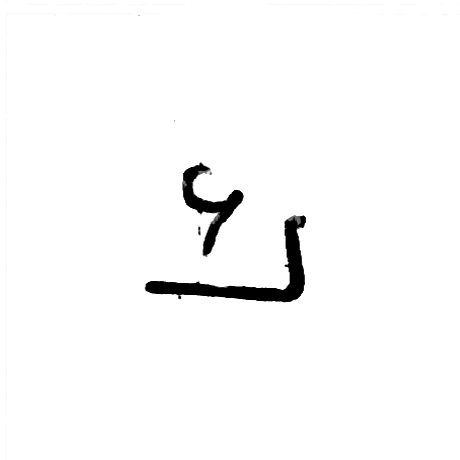

In [5]:
PIL.Image.open(str(chars[1]))

And some tulips:

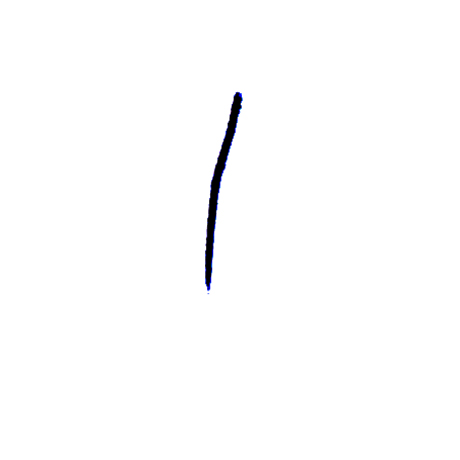

In [6]:
chars02 = list(data_dir.glob('02/*'))
PIL.Image.open(str(chars02[0]))

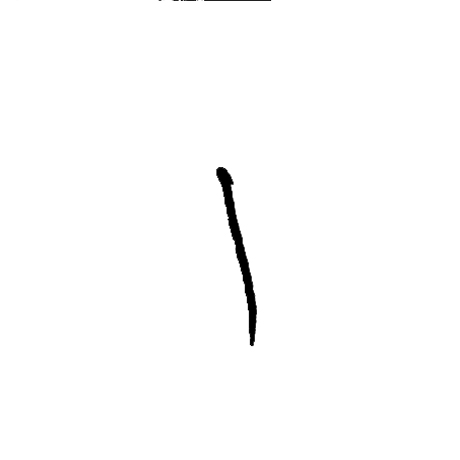

In [7]:
PIL.Image.open(str(chars02[1]))

# Load data using a Keras utility

using the `tf.keras.utils.image_dataset_from_directory` utility to will take our dataset from a directory of images on disk to a `tf.data.Dataset`.

## Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

It's good practice to use a validation split when developing your model. Let's use 80% of the images for training, and 20% for validation.

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 40826 files belonging to 35 classes.
Using 32661 files for training.
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-09-08 16:44:31.069361: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-08 16:44:31.069486: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 40826 files belonging to 35 classes.
Using 8165 files for validation.


You can find the class names in the `class_names` attribute on these datasets. These correspond to the directory names in alphabetical order.

In [11]:
class_names = train_ds.class_names
print(class_names)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35']


## Visualize the data

Here are the first nine images from the training dataset:

2022-09-08 16:44:31.620651: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


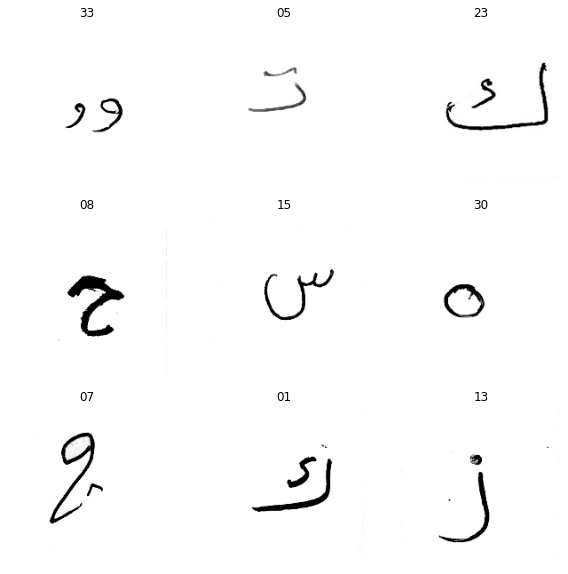

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Configure the dataset for performance


- `Dataset.cache` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.
- `Dataset.prefetch` overlaps data preprocessing and model execution while training.

Interested readers can learn more about both methods, as well as how to cache data to disk in the *Prefetching* section of the [Better performance with the tf.data API](../../guide/data_performance.ipynb) guide.

In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Standardize the data

The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network; in general you should seek to make your input values small.

Here, you will standardize values to be in the `[0, 1]` range by using `tf.keras.layers.Rescaling`:

In [15]:
normalization_layer = layers.Rescaling(1./255)

There are two ways to use this layer. You can apply it to the dataset by calling `Dataset.map`:

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

Or, you can include the layer inside your model definition, which can simplify deployment. Let's use the second approach here.

Note: You previously resized images using the `image_size` argument of `tf.keras.utils.image_dataset_from_directory`. If you want to include the resizing logic in your model as well, you can use the `tf.keras.layers.Resizing` layer.

## Overfitting

In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 60% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of [overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit).

When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

There are multiple ways to fight overfitting in the training process. In this tutorial, you'll use *data augmentation* and add *Dropout* to your model.

## Dropout

Another technique to reduce overfitting is to introduce [dropout](https://developers.google.com/machine-learning/glossary#dropout_regularization) regularization to the network.

When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

Let's create a new neural network with `tf.keras.layers.Dropout` before training it using the augmented images:

In [17]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), 
  layers.Conv2D(8, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),  
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compile and train the model

In [18]:
with tf.device("/gpu:0"):
    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

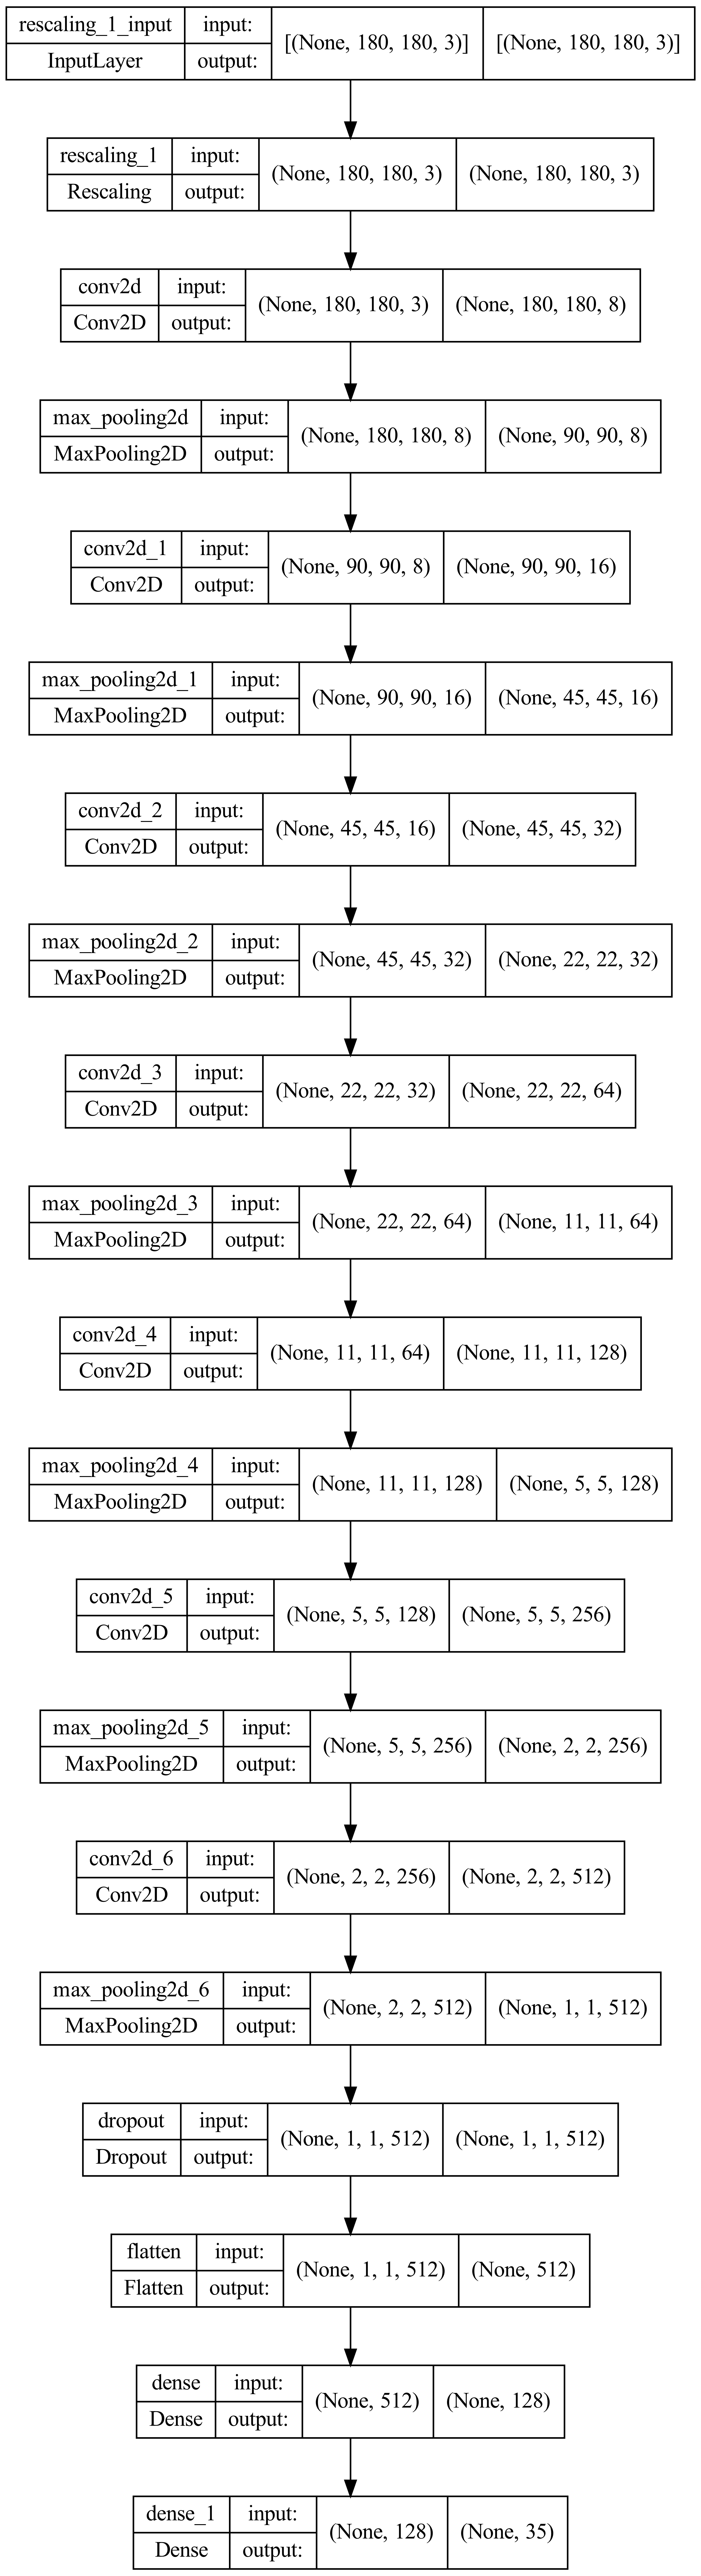

In [25]:
#model.summary()
from keras.utils.vis_utils import plot_model

tf.keras.utils.plot_model(model, to_file='keras_diagram.png', show_shapes=True, dpi=500)

In [ ]:
epochs=10
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[es_callback,tensorboard_callback]
)

## Visualize training results

After applying data augmentation and `tf.keras.layers.Dropout`, there is less overfitting than before, and training and validation accuracy are closer aligned:

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()